In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
iris = sns.load_dataset('iris')
iris[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
train_exam2, test_exam2, train_target2, test_target2 = train_test_split(iris.iloc[:, :4],  #문제
                        iris['species'], #정답
                        test_size=0.2, #검증비율 20%, 훈련비율 80%
                        random_state=100 #seed
                )

In [6]:
tree_clf = DecisionTreeClassifier(
                max_depth=3, random_state=42
)

In [7]:
tree_clf.fit(train_exam2, train_target2) 

DecisionTreeClassifier(max_depth=3, random_state=42)

In [8]:
tree_clf.score(train_exam2, train_target2) 

0.9833333333333333

In [9]:
com_target = tree_clf.predict(test_exam2) #모의고사를 풀어보자! -> 문제를 푼 답!
com_target[:5]

array(['virginica', 'setosa', 'virginica', 'setosa', 'virginica'],
      dtype=object)

In [10]:
accuracy_score(test_target2, com_target) 

0.9666666666666667

In [11]:
print(tree_clf.feature_importances_)

[0.         0.         0.59655894 0.40344106]


In [12]:
result5 = tree_clf.predict_proba([[2.1, 0.8, 2.4, 0.4]]) 
result5[0]

array([1., 0., 0.])

In [13]:
#'setosa', 'versicolor', 'virginica'
max_proba = max(result5[0])
max_index = list(result5[0]).index(max_proba)
print(max_index)

0


In [14]:
def func4(x):
    if x == 0:
        print('setosa!!')
    elif x == 1:
        print('versicolor!!')
    else:
        print('virginica')

In [15]:
func4(max_index)

setosa!!


In [16]:
from sklearn.tree import export_graphviz
import graphviz

In [17]:
export_graphviz(tree_clf, # 공부한 내용
               out_file = "iris_tree.dot", # 저장할 파일 이름
               feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], # 공부한 컬럼
               class_names = iris['species'].unique(), # 타겟 컬럼.unique() --> 분류할 타겟
               rounded=True, # 보여지는 모습 (둥글게, 네모나게)
               filled=True  # 색깔
                )

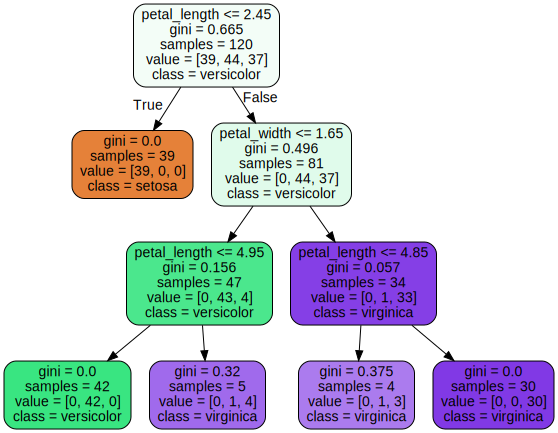

In [18]:
with open("iris_tree.dot") as f2:
    dot_graph2 = f2.read() # 읽어왔을 경우: dot_graph2 ==> 텍스트 형태
    
dot2 = graphviz.Source(dot_graph2)
dot2.format = 'png' # dot2를 저장할 포맷 설정
dot2.render(filename='iris_tree', directory='.', cleanup=True) # . : 현재 위치
dot2